#6.4 Supervised Machine Learning

## Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

## Path and Dataframe

In [3]:
#defining path and importing dataframe
path = r'C:\Users\april\Analyzing University Student Retention and Future Success'

df = pd.read_csv(os.path.join(path, 'Data', 'data_merged.csv'))

## Cleaning data (Checking Data)

In [4]:
df.columns

Index(['Unnamed: 0', 'Marital Status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricul

In [5]:
df.head()

,Unnamed: 0,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.shape

(4424, 38)

In [7]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                                        0
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [8]:
#checking for duplicates
dups = df.duplicated()

In [9]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

## Data Prep for Regression Analysis

### Hypothesis: There is no significant linear relationship between a student's admission grade and their average 1st semester grade.

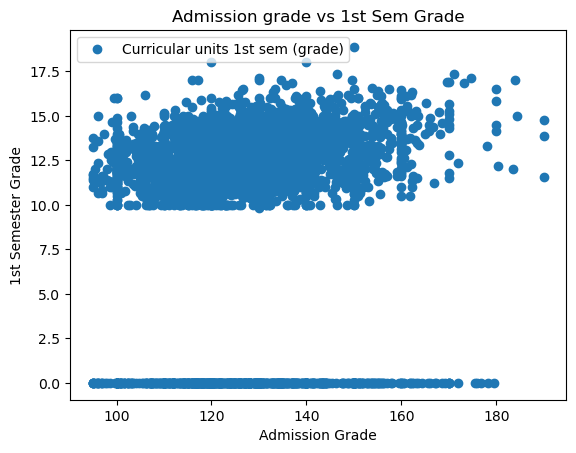

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Admission grade', y='Curricular units 1st sem (grade)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Admission grade vs 1st Sem Grade')  
plt.xlabel('Admission Grade')  
plt.ylabel('1st Semester Grade')  
plt.show()

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Admission grade'].values.reshape(-1,1)
y = df['Curricular units 1st sem (grade)'].values.reshape(-1,1)

In [13]:
X

array([[127.3],
       [142.5],
       [124.8],
       ...,
       [149.5],
       [153.8],
       [152. ]])

In [14]:
y

array([[ 0.        ],
       [14.        ],
       [ 0.        ],
       ...,
       [14.9125    ],
       [13.8       ],
       [11.66666667]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)


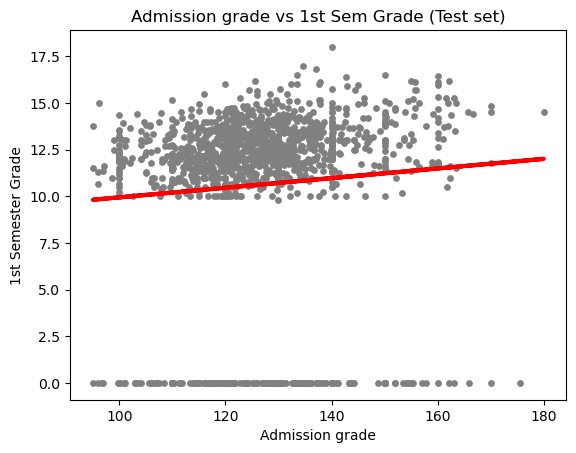

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Admission grade vs 1st Sem Grade (Test set)')
plot_test.xlabel('Admission grade')
plot_test.ylabel('1st Semester Grade')
plot_test.show()

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02577227]]
Mean squared error:  22.936604626651242
R2 score:  0.004078051198881938


#### The results of the regression analysis indicate that the independent variable used in the model has very limited predictive power. The slope of approximately 0.026 suggests only a minimal change in the dependent variable for each unit increase in the predictor. Additionally, the R² score is just 0.004, meaning that less than 1% of the variation in the outcome can be explained by this model. The mean squared error of 22.94 also suggests a relatively high level of prediction error. Taken together, these findings suggest that the variable chosen does not meaningfully predict the target and that other factors are likely more influential. Further analysis using additional or alternative features may yield a more accurate and insightful model.

In [22]:
y_predicted

array([[11.15314993],
       [10.91346779],
       [10.86450047],
       ...,
       [10.43925796],
       [10.70471237],
       [11.01397965]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,13.000000,11.153150
1,0.000000,10.913468
2,13.000000,10.864500
3,12.500000,10.779452
4,11.500000,10.346478
5,12.400000,10.457299
6,10.600000,10.457299
7,14.314286,10.629973
8,11.714286,10.457299
9,15.200000,11.367060


In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02577227]]
Mean squared error:  23.495937172278808
R2 score:  0.006017073084483515


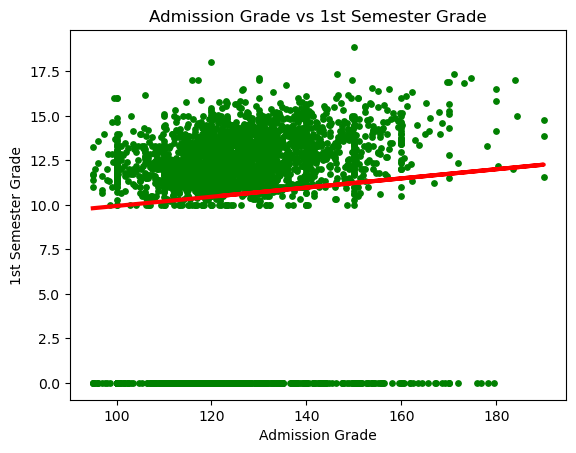

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Admission Grade vs 1st Semester Grade')
plot_test.xlabel('Admission Grade')
plot_test.ylabel('1st Semester Grade')
plot_test.show()

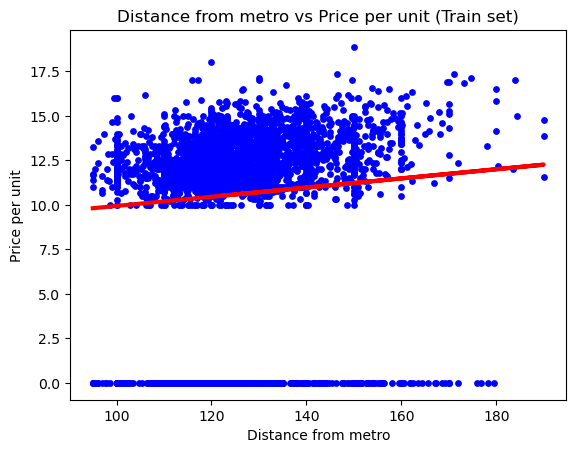

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

#### Interpretation: When comparing the actual 1st semester grades to the predicted values from the regression model, it's clear that the model consistently predicts values clustered around the 10–11 range, regardless of whether the actual grades are much lower (e.g., 0.0) or much higher (e.g., 15.6). This pattern suggests that the model has limited predictive power and fails to capture the true variability in student performance.